# MIMO system simulation and identification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/Proyecto_Splra")

In [3]:
#!pip install slycot
!pip install control
#!pip install sippy-rcognita
!pip install scienceplots

In [4]:
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended texlive-latex-recommended cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [5]:
import os
os.chdir("/content/drive/MyDrive/Proyecto_Splra/SIPPY-master")
!python setup.py install

error in sippy setup command: 'python_requires' must be a string containing valid version specifiers; Invalid specifier: '<=3.7.*'


In [6]:
from __future__ import division
from past.utils import old_div
from sippy import *
from sippy import functionset as fset
from sippy import functionsetSIM as fsetSIM
import numpy as np
import pandas as pd
import control as cnt
import matplotlib.pyplot as plt
np.random.seed(3021984)

import warnings
warnings.filterwarnings('ignore')

import os
import sys
sys.path.append('/content/drive/MyDrive/Proyecto_Splra/Python')

import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 500
mpl.rcParams['savefig.format'] = 'svg'
mpl.rcParams['font.family'] = 'serif'

In [7]:
from Lra_Modeling import *
from Sparse_Lra import *

## System simulation

In [8]:
# 4*3 MIMO system
# generating transfer functions in z-operator
ts = 1.

In [9]:
num =  [[[0,0,0.4, 0.33, 0., 0.], [0,0,0,0.10, 0., 0.],[0,0,0,0.70, 0.55, 0.22],[0,0,-0.9, -0.11, 0., 0.]],
        [[0,0,0,-0.85, -0.575, -0.277],[0,0,0,0,0.71, 0.123],
       [0,0,-0.1, 0., 0., 0.],[0,0,0.994, 0., 0., 0.]],[[0,0,0.2, 0., 0., 0.],[0,0,0,0.821, 0.432, 0.]
       ,[0,0,0.1, 0., 0., 0.],[0,0,0,0,0.891, 0.223] ]]

In [10]:
den = [[[1., -0.3, -0.25, -0.021, 0., 0.],[1., -0.3, -0.25, -0.021, 0., 0.],[1., -0.3, -0.25, -0.021, 0., 0.]
        ,[1., -0.3, -0.25, -0.021, 0., 0.]]
      ,[[1., -0.4, 0., 0., 0.,0.],[1., -0.4, 0., 0., 0.,0.],[1., -0.4, 0., 0., 0.,0.],[1., -0.4, 0., 0., 0.,0.]]
      ,[[1., -0.1, -0.3, 0., 0.,0.],[1., -0.1, -0.3, 0., 0.,0.],[1., -0.1, -0.3, 0., 0.,0.],[1., -0.1, -0.3, 0., 0.,0.]]]

In [11]:
g = cnt.tf(num,den, ts)

In [9]:
g

TransferFunction([[array([0.4 , 0.33, 0.  , 0.  ]), array([0.1, 0. , 0. ]), array([0.7 , 0.55, 0.22]), array([-0.9 , -0.11,  0.  ,  0.  ])], [array([-0.85 , -0.575, -0.277]), array([0.71 , 0.123]), array([-0.1,  0. ,  0. ,  0. ]), array([0.994, 0.   , 0.   , 0.   ])], [array([0.2, 0. , 0. , 0. ]), array([0.821, 0.432, 0.   ]), array([0.1, 0. , 0. , 0. ]), array([0.891, 0.223])]], [[array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ]), array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ]), array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ]), array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ])], [array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ]), array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ]), array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ]), array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ])], [array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ]), array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ]), array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ]), array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ])]], 1.0)

In [12]:
# time
tfin = 500
npts = int(old_div(tfin, ts)) + 1
Time = np.linspace(0, tfin, npts)

In [13]:
#INPUT#
Usim = np.zeros((4, npts))
[Usim[0, :],_,_] = fset.GBN_seq(npts, 0.08, Range = [-1, 1])
[Usim[1, :],_,_] = fset.GBN_seq(npts, 0.08, Range = [-1, 1])
[Usim[2, :],_,_] = fset.GBN_seq(npts, 0.08, Range = [-1, 1])
[Usim[3, :],_,_] = fset.GBN_seq(npts, 0.08, Range = [-1, 1])

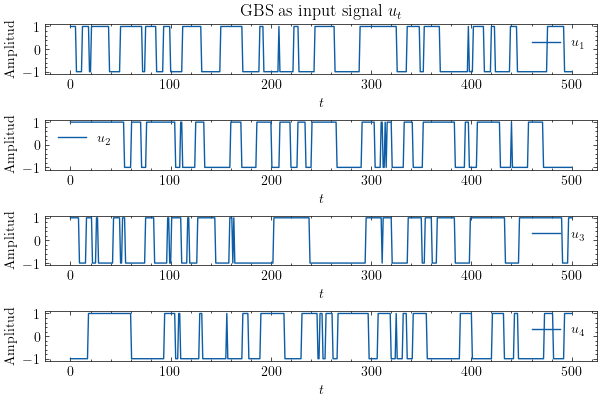

In [14]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(4,1,layout='constrained',figsize=(6, 4))

    axs[0].plot(Time, Usim[0, :],label='$u_1$')
    axs[0].set_xlabel('$t$')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_title('GBS as input signal $u_t$')
    axs[0].legend()

    axs[1].plot(Time, Usim[1, :],label='$u_2$')
    axs[1].set_xlabel('$t$')
    axs[1].set_ylabel('Amplitud')
    axs[1].legend()

    axs[2].plot(Time, Usim[2, :],label='$u_3$')
    axs[2].set_xlabel('$t$')
    axs[2].set_ylabel('Amplitud')
    axs[2].legend()

    axs[3].plot(Time, Usim[3, :],label='$u_4$')
    axs[3].set_xlabel('$t$')
    axs[3].set_ylabel('Amplitud')
    axs[3].legend()

    #fig.savefig('mimo_input.jpg', dpi=400)

In [ ]:
Time, Yout = cnt.forced_response(g,  Time , Usim)

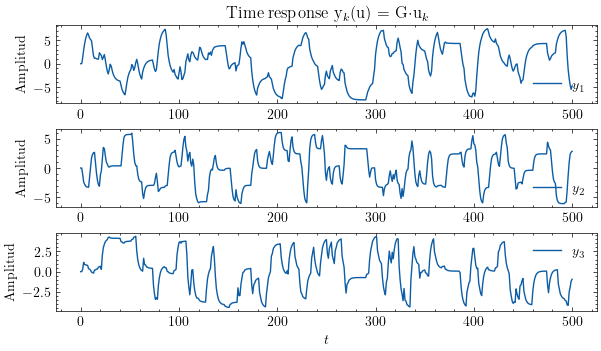

In [ ]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(3,1,layout='constrained',figsize=(6, 3.5))

    axs[0].plot(Time, Yout[:, 0],label='$y_1$')
    #axs[0].set_xlabel('$t$')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_title('Time response y$_k$(u) = G$\cdot$u$_k$')
    axs[0].legend()

    axs[1].plot(Time, Yout[:, 1],label='$y_2$')
    #axs[1].set_xlabel('$t$')
    axs[1].set_ylabel('Amplitud')
    axs[1].legend()

    axs[2].plot(Time, Yout[:, 2],label='$y_3$')
    axs[2].set_xlabel('$t$')
    axs[2].set_ylabel('Amplitud')
    axs[2].legend()

    plt.show()
    fig.savefig('mimo_output.jpg', dpi=400)

In [13]:
#INPUT Validation#
np.random.seed(3022023)
Usim_val = np.zeros((4, npts))
Usim_noise = np.zeros((4, npts))
[Usim_val[0, :],_,_] = fset.GBN_seq(npts, 0.03, Range = [-0.4, 0.2])
[Usim_val[1, :],_,_] = fset.GBN_seq(npts, 0.03)
[Usim_val[2, :],_,_] = fset.GBN_seq(npts, 0.03, Range = [2.8, 6.7])
[Usim_val[3, :],_,_] = fset.GBN_seq(npts, 0.03, Range = [6., 10.])

In [ ]:
Yval, Time, Xsim_val = cnt.matlab.lsim(g, Usim_val.T, Time)

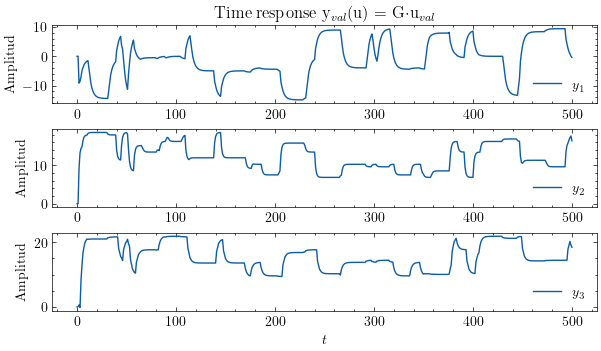

In [ ]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(3,1,layout='constrained',figsize=(6, 3.5))

    axs[0].plot(Time, Yval[:, 0],label='$y_1$')
    #axs[0].set_xlabel('$t$')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_title('Time response y$_{val}$(u) = G$\cdot$u$_{val}$')
    axs[0].legend()

    axs[1].plot(Time, Yval[:, 1],label='$y_2$')
    #axs[1].set_xlabel('$t$')
    axs[1].set_ylabel('Amplitud')
    axs[1].legend()

    axs[2].plot(Time, Yval[:, 2],label='$y_3$')
    axs[2].set_xlabel('$t$')
    axs[2].set_ylabel('Amplitud')
    axs[2].legend()

    plt.show()
    fig.savefig('mimo_val.jpg', dpi=400)

## System Identification

### Sparse Lra

In [ ]:
var = 0.01
Ytot = Yout + var*np.random.randn(Yout.shape[0],Yout.shape[1])
w=np.block([[Usim],[Yout.T]])
wr=np.block([[Usim],[Ytot.T]])

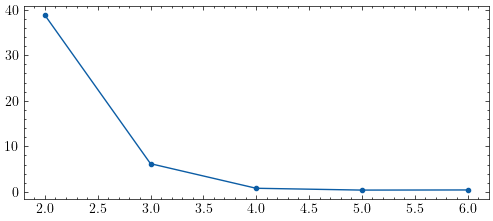

In [ ]:
lag_est(wr,7,4,0,1e-2,1e-2)
plt.show()

In [ ]:
M,fit,wh,R_sp,sys_tf,sys_ss,x0 = Sparse_lra_sysid(wr,5,4,x0=0,tol=5e-2,delta=5e-2)

In [ ]:
M,fit

(0.6411627028147849, 99.51429547831509)

In [ ]:
sys_tf

TransferFunction([[array([0.40358809, 0.44615854, 0.078851  , 0.        ]), array([0.09944414, 0.02540658, 0.        ]), array([0.70213081, 0.76024182, 0.37072127]), array([-0.89899052, -0.38072259,  0.        ,  0.01435621])], [array([-0.84997355, -0.5753228 , -0.27682228]), array([0.71055036, 0.12234432]), array([-0.10007643,  0.        ,  0.        ,  0.        ]), array([ 0.994301 ,  0.       ,  0.       , -0.0010563])], [array([0.19945134, 0.        , 0.        , 0.        ]), array([0.82162866, 0.4311537 , 0.        ]), array([0.09988471, 0.        , 0.        , 0.        ]), array([0.89104148, 0.22285362])]], [[array([ 1.        , -0.        , -0.3948494 , -0.07078608, -0.        ,
       -0.        ]), array([ 1.        , -0.        , -0.3948494 , -0.07078608, -0.        ,
       -0.        ]), array([ 1.        , -0.        , -0.3948494 , -0.07078608, -0.        ,
       -0.        ]), array([ 1.        , -0.        , -0.3948494 , -0.07078608, -0.        ,
       -0.        ])

In [ ]:
g

TransferFunction([[array([0.4 , 0.33, 0.  , 0.  ]), array([0.1, 0. , 0. ]), array([0.7 , 0.55, 0.22]), array([-0.9 , -0.11,  0.  ,  0.  ])], [array([-0.85 , -0.575, -0.277]), array([0.71 , 0.123]), array([-0.1,  0. ,  0. ,  0. ]), array([0.994, 0.   , 0.   , 0.   ])], [array([0.2, 0. , 0. , 0. ]), array([0.821, 0.432, 0.   ]), array([0.1, 0. , 0. , 0. ]), array([0.891, 0.223])]], [[array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ]), array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ]), array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ]), array([ 1.   , -0.3  , -0.25 , -0.021,  0.   ,  0.   ])], [array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ]), array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ]), array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ]), array([ 1. , -0.4,  0. ,  0. ,  0. ,  0. ])], [array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ]), array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ]), array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ]), array([ 1. , -0.1, -0.3,  0. ,  0. ,  0. ])]], 1.0)

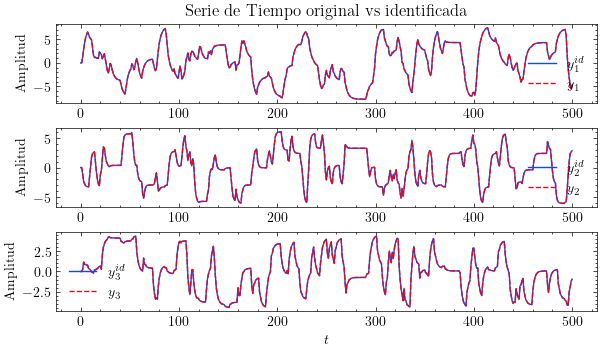

In [ ]:
with plt.style.context(['science','high-vis']):
    fig, axs = plt.subplots(3,1,layout='constrained',figsize=(6, 3.5))

    axs[0].plot(Time, wh[-3, :],label='$y^{id}_1$')
    axs[0].plot(Time, w[-3, :],label='$y_1$')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_title('Serie de Tiempo original vs identificada ')
    axs[0].legend()

    axs[1].plot(Time,  wh[-2, :],label='$y^{id}_2$')
    axs[1].plot(Time, w[-2, :],label='$y_2$')
    axs[1].set_ylabel('Amplitud')
    axs[1].legend()

    axs[2].plot(Time,  wh[-1, :],label='$y^{id}_3$')
    axs[2].plot(Time, w[-1, :],label='$y_3$')
    axs[2].set_xlabel('$t$')
    axs[2].set_ylabel('Amplitud')
    axs[2].legend()

    plt.show()
    #fig.savefig('mimo_val.jpg', dpi=400)

In [ ]:
Yval_sim, Time, Xsim_val = cnt.matlab.lsim(sys_ss, Usim_val.T, Time)

AttributeError: module 'control.matlab' has no attribute 'matlab'

In [ ]:
Yval.shape,Yval_sim.shape

((501, 3), (501, 3))

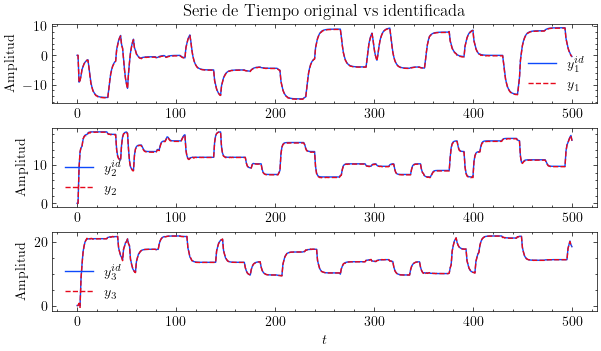

In [ ]:
with plt.style.context(['science','high-vis']):
    fig, axs = plt.subplots(3,1,layout='constrained',figsize=(6, 3.5))

    axs[0].plot(Time, Yval[:,-3],label='$y^{id}_1$')
    axs[0].plot(Time, Yval_sim[:,-3],label='$y_1$')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_title('Serie de Tiempo original vs identificada ')
    axs[0].legend()

    axs[1].plot(Time,  Yval[:,-2],label='$y^{id}_2$')
    axs[1].plot(Time, Yval_sim[:,-2],label='$y_2$')
    axs[1].set_ylabel('Amplitud')
    axs[1].legend()

    axs[2].plot(Time,  Yval[:,-1],label='$y^{id}_3$')
    axs[2].plot(Time, Yval_sim[:,-1],label='$y_3$')
    axs[2].set_xlabel('$t$')
    axs[2].set_ylabel('Amplitud')
    axs[2].legend()

    plt.show()

In [ ]:
1-(la.norm(Yval-Yval_sim))/la.norm(Yval-np.mean(Yval))

0.9876613084714424

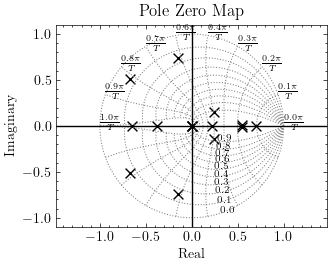

In [ ]:
with plt.style.context(['science','high-vis']):
    cnt.pzmap(sys_ss,grid=True)
    plt.show()

### Sippy

In [ ]:
from sippy import *
from sippy import functionset as fset
import control.matlab as cnt
from sippy import functionsetSIM as fsetSIM

In [ ]:
wr.shape

(7, 501)

In [ ]:
sys_sippy = system_identification(wr[-3:,:], wr[:-3,:], 'N4SID',  IC='AIC')

The suggested order is: n= 10


In [ ]:
xid, yid = fsetSIM.SS_lsim_process_form(sys_sippy.A, sys_sippy.B, sys_sippy.C, sys_sippy.D,wr[:-3,:])

In [ ]:
1-(la.norm(wr[-3:,:]-yid)/la.norm(wr[-3:,:]-np.mean(wr[-3:,:],axis=1).reshape(3,1)))

0.9334302930948171

In [ ]:
xid_val, yid_val = fsetSIM.SS_lsim_process_form(sys_sippy.A, sys_sippy.B, sys_sippy.C, sys_sippy.D, Usim_val)

In [ ]:
Yval.shape,yid_val.shape

((501, 3), (3, 501))

In [ ]:
1-(la.norm(Yval-yid_val.T)/la.norm(Yval-np.mean(Yval,axis=0)))

0.9677587610869466

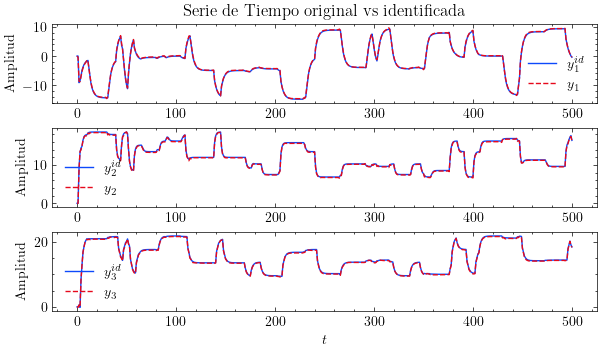

In [ ]:
with plt.style.context(['science','high-vis']):
    fig, axs = plt.subplots(3,1,layout='constrained',figsize=(6, 3.5))

    axs[0].plot(Time, Yval[:,-3],label='$y^{id}_1$')
    axs[0].plot(Time, yid_val[-3,:],label='$y_1$')
    axs[0].set_ylabel('Amplitud')
    axs[0].set_title('Serie de Tiempo original vs identificada ')
    axs[0].legend()

    axs[1].plot(Time,  Yval[:,-2],label='$y^{id}_2$')
    axs[1].plot(Time, yid_val[-2,:],label='$y_2$')
    axs[1].set_ylabel('Amplitud')
    axs[1].legend()

    axs[2].plot(Time,  Yval[:,-1],label='$y^{id}_3$')
    axs[2].plot(Time, yid_val[-1,:],label='$y_3$')
    axs[2].set_xlabel('$t$')
    axs[2].set_ylabel('Amplitud')
    axs[2].legend()

    plt.show()